In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

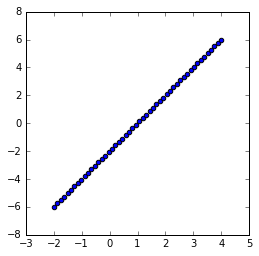

In [2]:
# y=2x-2에 균등한 간격으로 놓여있는 샘플 50개를 만듦
num_examples = 50
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
plt.show()

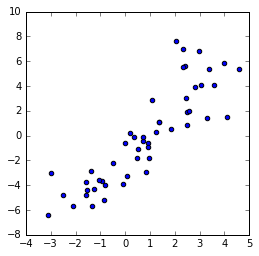

In [3]:
# 각 x,y에 랜덤한 gaussian distribution을 따르는 noise를 추가해 데이터를 흩뜨림
X += np.random.randn(2, num_examples)
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
plt.show()

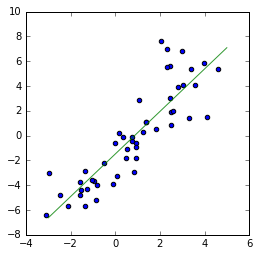

In [4]:
# numpy 안에 있는 polyfit이라는 메소드를 이용하여 선형 회귀 모델을 쉽게 만들 수 있다
# 여기서 polyfit이 찾아준 가중치 두개를 NN을 학습시켜 찾아내는 것이 목표
weights = np.polyfit(X[0], X[1], 1)
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
line_x_range = (-3, 5)
plt.plot(line_x_range, [weights[1] + a * weights[0] for a in line_x_range], "g", alpha=0.8)
plt.show()

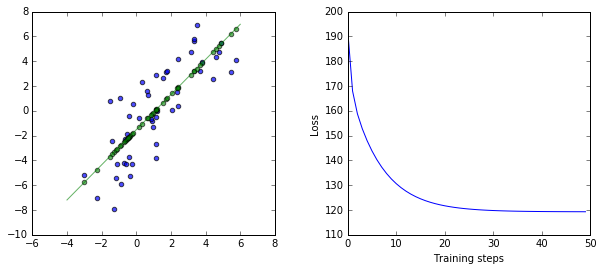

In [9]:
num_examples = 50
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
X += np.random.randn(2, num_examples)

# array X안에 element 2개를 분리. X[0]=x, X[1]=y
# x와 상수 1(bias)을 묶어줌
x, y = X
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32)


# iteration동안 바뀌는 loss를 기록하기 위해 빈 list를 만듦
losses = []

# 학습 횟수:50회, 학습률:0.002
training_steps = 50
mu = 0.002

# 텐서플로우는 session위에서 모든 operation이 실행
with tf.Session() as sess:
    
    # input은 x,1로 이루어진 array, target은 실제 y값으로 둘 다 고정되어 있는 값임
    # weight는 2x1 matrix로 각각 X, 1에 대응되는 가중치. (즉,WX+b에서 W[0]=W, W[1]=b 겠죠?)
    input = tf.constant(x_with_bias)
    target = tf.constant(np.transpose([y]).astype(np.float32))
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))
    
    # 변수 초기화
    tf.initialize_all_variables().run()
    
    # yhat: WX+b꼴의 실제 y에 대한 추정치(혹은 NN에 의한 output)
    # yerror: 추정치와 목푯값의 차
    # L2 loss fn 이용 (MSE)
    # GradientDescentOptimizer를 이용해 가중치를 업데이트
    yhat = tf.matmul(input, weights)
    yerror = tf.sub(yhat, target)
    loss = tf.reduce_mean(tf.nn.l2_loss(yerror))
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    
    '''l2_loss와 GradientDescentOptimizer의 역할은 다음과 같습니다. 
       l2_loss : loss = 0.5 * tf.reduce_sum(tf.mul(yerror, yerror))
       GradientDescentOptimizer : gradient = tf.reduce_sum(tf.transpose(tf.mul(input, yerror)), 1, keep_dims=True)
       update_weights = tf.assign_sub(weights, mu * gradient)'''
  
    # for문 안에서 학습 진행
    # update_weights를 실행하고 학습마다 바뀌는 loss를 아까 만들어준 losses라는 빈 list에 누적시킴
    for _ in range(training_steps):
        sess.run(update_weights)
        losses.append(loss.eval())

    
    # 학습이 끝난 뒤 최종 W, yhat
    betas = weights.eval()
    yhat = yhat.eval()

# Show the results.
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7)
ax1.scatter(x, np.transpose(yhat)[0], c="g", alpha=.6)
line_x_range = (-4, 6)
ax1.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training steps")
plt.show()